In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import dateparser
import matplotlib.pyplot as plt
import re  

In [25]:
url="https://fr.wikipedia.org/wiki/Wikip%C3%A9dia:Le_saviez-vous_%3F/Archives/2017"
response = requests.get(url)

if response.status_code == 200:
    print("Requete effectuée avec succès")
else:
    print("Erreur lors de la requete")

Requete effectuée avec succès


## Trouver la première citation

In [26]:
soup = BeautifulSoup(response.text, 'html.parser')
# Cibler uniquement la section body pour ne pas prendre en considerations les li du menu
content_div = soup.find("div", id="bodyContent")
premiere_citation = content_div.find("li")

In [32]:
if premiere_citation:
    print(premiere_citation.get_text(strip=True))
else:
    print("Aucune citation trouvée.")

Premier tome de laRevue des deux Mondes, août 1829.Créée en1829, laRevue des deux Mondes(reproduction)est réputée pour être la plus vieillerevueeuropéenneencore en activité.


## Extraire la date

In [39]:
def parse_archive(year):
    url = f"https://fr.wikipedia.org/wiki/Wikip%C3%A9dia:Le_saviez-vous_%3F/Archives/{year}"
    response = requests.get(url)
    if response.status_code != 200:
        print(f"Erreur lors de la requête pour l'année {year}")
        return []
    
    soup = BeautifulSoup(response.text, 'html.parser')
    
    content_div = soup.find("div", id="bodyContent")
    quotes_ul = content_div.find("ul")
    li_elements = quotes_ul.find_all("li")
    
    # Expression régulière pour extraire la date au format "du 30 décembre 2016"
    # On utilise re.IGNORECASE pour autoriser les majuscules/minuscules
    pattern = re.compile(r"du\s*(\d{1,2}\s+[a-z]+\s+\d{4})", re.IGNORECASE)
    
    data = []
    for li in li_elements:
        date_str = None
        date_standard = None

        #extraction de la date via la structure <dl><dd><small>
        small_tag = li.select_one("dl dd small")
        if small_tag:
            # Normalisation du texte (pour éliminer les espaces)
            small_text = " ".join(small_tag.get_text(strip=True).split())
            match = pattern.search(small_text)
            if match:
                date_str = match.group(1)  
                parsed_date = dateparser.parse(date_str, languages=['fr'])
                if parsed_date:
                    date_standard = parsed_date.strftime("%Y-%m-%d")
        else:
            #certains articles n'ont pas de balise <dl>, ils ont la date dans une balise <time>
            time_tag = li.find("time")
            if time_tag:
                if time_tag.has_attr("datetime"):
                    datetime_value = time_tag["datetime"]
                    parsed_date = dateparser.parse(datetime_value)
                    if parsed_date:
                        date_standard = parsed_date.strftime("%Y-%m-%d")
                else:
                    date_str = time_tag.get_text(strip=True)
                    parsed_date = dateparser.parse(date_str, languages=['fr'])
                    if parsed_date:
                        date_standard = parsed_date.strftime("%Y-%m-%d")
        
        #isoler le texte de la quote
        dl_tag = li.find("dl")
        if dl_tag:
            dl_tag.decompose() #supprimer la balise dl 

        quote_text = li.get_text(strip=True) 
        
        data.append({
            'year': year,
            'date': date_standard,
            'quote': quote_text
        })
    return data


_Parsing 2017_ :

In [41]:
data_2017 = parse_archive(2017)
df_2017 = pd.DataFrame(data_2017, columns=['year', 'date', 'quote'])
print("DataFrame pour l'année 2017 :")
print(df_2017)

DataFrame pour l'année 2017 :
     year        date                                              quote
0    2017        None  Premier tome de laRevue des deux Mondes, août ...
1    2017        None  EnSuède, les règles d’usage dututoiement et du...
2    2017        None  Une Citroën 2 CV au Mondial de l’automobile de...
3    2017        None  Endécembre 1916, ayant découvert que la densit...
4    2017  2017-01-01  Pays ayant signé (en jaune) et ceux ayant sign...
..    ...         ...                                                ...
851  2017        None  Victor-EmmanuelIII, roi d’Italie.Victor-Emmanu...
852  2017        None  Comprimés de Sildénafil.Lecitrate de sildénafi...
853  2017        None  Desbateauxcapables de naviguer sanséquipageson...
854  2017        None  Le phare de Gatteville.Lephare de Gatteville(p...
855  2017        None  Le nombre decommunes suédoisesa baissé de 87 %...

[856 rows x 3 columns]


_Parsing 2021_ :

In [42]:
data_2021 = parse_archive(2021)
df_2021 = pd.DataFrame(data_2021, columns=['year', 'date', 'quote'])
print("DataFrame pour l'année 2021 :")
print(df_2021)

DataFrame pour l'année 2021 :
     year        date                                              quote
0    2021  2021-01-01  Affiche de la première mondiale deRigoletto(11...
1    2021  2021-01-01          Aupays des kiwis, la France se nommeWīwī.
2    2021  2021-01-01  La Rue Mosnier aux drapeauxd’Édouard Manet.La ...
3    2021  2021-01-02  Jean Valjean par Gustave Brion.L’astéroïde(246...
4    2021  2021-01-03  L’hôtel de Matignon.D’abordhôtel particulier, ...
..    ...         ...                                                ...
895  2021        None  LaNew Riverest probablement l’une des plus anc...
896  2021        None  LaBelgiqueest le seul pays non-membre duCommon...
897  2021        None  Logo du film Nosferatu le vampire.Malgré les n...
898  2021        None  Gâteaux de riz gluant : mochi.Au Japon, la con...
899  2021        None  Si lesnatures mortesdePaul Cézannecontiennent ...

[900 rows x 3 columns]


_Parsing 2017 to 2020_ :

In [43]:
data_2017_2020 = []
for y in range(2017, 2021):
    data_2017_2020.extend(parse_archive(y))

df_2017_2020 = pd.DataFrame(data_2017_2020, columns=['year', 'date', 'quote'])
print()
print("Parsé l'année 2017-2020 :")
print(df_2017_2020)


Parsé l'année 2017-2020 :
      year        date                                              quote
0     2017        None  Premier tome de laRevue des deux Mondes, août ...
1     2017        None  EnSuède, les règles d’usage dututoiement et du...
2     2017        None  Une Citroën 2 CV au Mondial de l’automobile de...
3     2017        None  Endécembre 1916, ayant découvert que la densit...
4     2017  2017-01-01  Pays ayant signé (en jaune) et ceux ayant sign...
...    ...         ...                                                ...
4125  2020        None  L’année de la sortie d’À bout de souffle, film...
4126  2020        None  Heinrich Schütz,Musikalische Exequien, Motette...
4127  2020        None  Dans lecalendrier cosmique de Carl Sagan, l’Hi...
4128  2020        None  un koala & feuilles d’eucalyptus.L’augmentatio...
4129  2020        None  Bouteilles de champagne sans ou avec millésime...

[4130 rows x 3 columns]


_DF Transformations_:

In [46]:
df_2017_2020 = df_2017_2020.drop(columns=['year'])
df_2017_2020['date'] = pd.to_datetime(df_2017_2020['date'], errors='coerce')

df_2017_2020['year'] = df_2017_2020['date'].dt.year
df_2017_2020['month'] = df_2017_2020['date'].dt.month

# Affichage du DataFrame transformé
print(df_2017_2020.head())

        date                                              quote  month    year
0        NaT  Premier tome de laRevue des deux Mondes, août ...    NaN     NaN
1        NaT  EnSuède, les règles d’usage dututoiement et du...    NaN     NaN
2        NaT  Une Citroën 2 CV au Mondial de l’automobile de...    NaN     NaN
3        NaT  Endécembre 1916, ayant découvert que la densit...    NaN     NaN
4 2017-01-01  Pays ayant signé (en jaune) et ceux ayant sign...    1.0  2017.0


_Exporting DataFrame to csv_:

In [50]:
import os

output_dir = "C:/Users/pc/Desktop/Projet1/Tp1/Data"
os.makedirs(output_dir, exist_ok=True)
output_file = os.path.join(output_dir, "Wikiquotes.csv")
df_2017_2020.to_csv(output_file, sep=";", index=False)

_Statistics_ :

In [53]:
df = pd.read_csv("C:/Users/pc/Desktop/Projet1/Tp1/Data/Wikiquotes.csv", sep=";")

## 1. Lignes avec des champs vides

In [54]:
empty_rows = df.isnull().any(axis=1)
nb_empty = empty_rows.sum()
print("Nombre de lignes avec au moins un champ vide :", nb_empty)

Nombre de lignes avec au moins un champ vide : 1026


## # 2. Année contenant le plus de quotes

In [ ]:
year_counts = df['year'].value_counts(dropna=True)
max_year = year_counts.idxmax()
max_count = year_counts.max()
print(f"L'année contenant le plus de quotes est {max_year} avec {max_count} quotes.")

L'année contenant le plus de quotes est 2018.0 avec 968 quotes.


## 3. Année contenant le moins de quotes

In [56]:
min_year = year_counts.idxmin()
min_count = year_counts.min()
print(f"L'année contenant le moins de quotes est {min_year} avec {min_count} quotes.")

L'année contenant le moins de quotes est 2019.0 avec 567 quotes.


## 4. La quote la plus longue (en nombre de caractères)

In [57]:
df['quote_length'] = df['quote'].str.len()
idx_longest = df['quote_length'].idxmax()
longest_quote = df.loc[idx_longest, 'quote']
longest_length = df.loc[idx_longest, 'quote_length']
print("La quote la plus longue est :")
print(longest_quote)
print("Nombre de caractères :", longest_length)

La quote la plus longue est :
Vue aérienne duZambèze, à la jonction entre :- laNamibieen haut à gauche, entre le Zambèze et son affluent leKwandoconstitue la pointe de labande de Caprivi,- laZambie, en haut, au delà du Zambèze, on aperçoit sur la rive du fleuve le faubourg deKazungula,- leZimbabween bas à droite avec l’île et une partie de la rive sud du Zambèze,- leBotswanaen bas à gauche, sur la partie droite de la rive. On distingue au fond le tracé de la route reliant Kasane au ferry menant à Kazungula.Lesfrontièresentre leBotswana, laZambie, laNamibieet leZimbabweconvergent en un quasi-quadripointsur le fleuveZambèze(vue aérienne).BALISE APPARIEE:FIN-BLOC
Nombre de caractères : 638


## 5. La quote la plus courte (en nombre de caractères)

In [58]:
idx_shortest = df['quote_length'].idxmin()
shortest_quote = df.loc[idx_shortest, 'quote']
shortest_length = df.loc[idx_shortest, 'quote_length']
print("La quote la plus courte est :")
print(shortest_quote)
print("Nombre de caractères :", shortest_length)

La quote la plus courte est :
actuellement
Nombre de caractères : 12


## 6. Combien de quotes contiennent "Victor Hugo"

In [59]:
victor_hugo_count = df['quote'].str.contains('Victor Hugo', case=False, na=False).sum()
print("Nombre de quotes contenant 'Victor Hugo' :", victor_hugo_count)

Nombre de quotes contenant 'Victor Hugo' : 12


## 7. Quelle quote parle de Pokémon ?

In [60]:
pokemon_quotes = df[df['quote'].str.contains(r'pok[eé]mon', case=False, na=False)]
if not pokemon_quotes.empty:
    print("La quote qui parle de Pokémon est :")
    for quote in pokemon_quotes['quote']:
        print("\n", quote)
else:
    print("Aucune quote ne semble parler de Pokémon.")

La quote qui parle de Pokémon est :

 Enmars 2017, un jeuneRussea été condamné à 3 ans et demi decolonie pénitentiairepour avoir joué àPokémon Godans uneéglise.


_Visualisation_ :

In [64]:
## Nettoyage des données
from collections import Counter
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# On s'assure que la colonne 'quote' ne contient pas de valeurs manquantes
df['quote'] = df['quote'].fillna("")

#Top 20 des mots fréquents
# Combinez toutes les citations en un seul texte
all_text = " ".join(df['quote'].tolist())

# Convertir en minuscule
all_text = all_text.lower()

# Supprimer la ponctuation (on garde les mots et les espaces)
all_text = re.sub(r'[^\w\s]', '', all_text)

# Découper en mots
words = all_text.split()

# Récupérer la liste des stopwords en français
stop_words = set(stopwords.words('french'))

# Filtrer les mots : on enlève les stopwords et les mots d'une seule lettre (souvent non pertinents)
filtered_words = [w for w in words if w not in stop_words and len(w) > 1]

# Compter les occurrences de chaque mot
word_counts = Counter(filtered_words)

# Récupérer les 20 mots les plus fréquents
top_20 = word_counts.most_common(20)

# Extraire les mots et leurs comptes dans des listes séparées pour le graphique
mots_top = [item[0] for item in top_20]
comptes_top = [item[1] for item in top_20]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Visualiser le top 20 sous forme d'un diagramme en barres

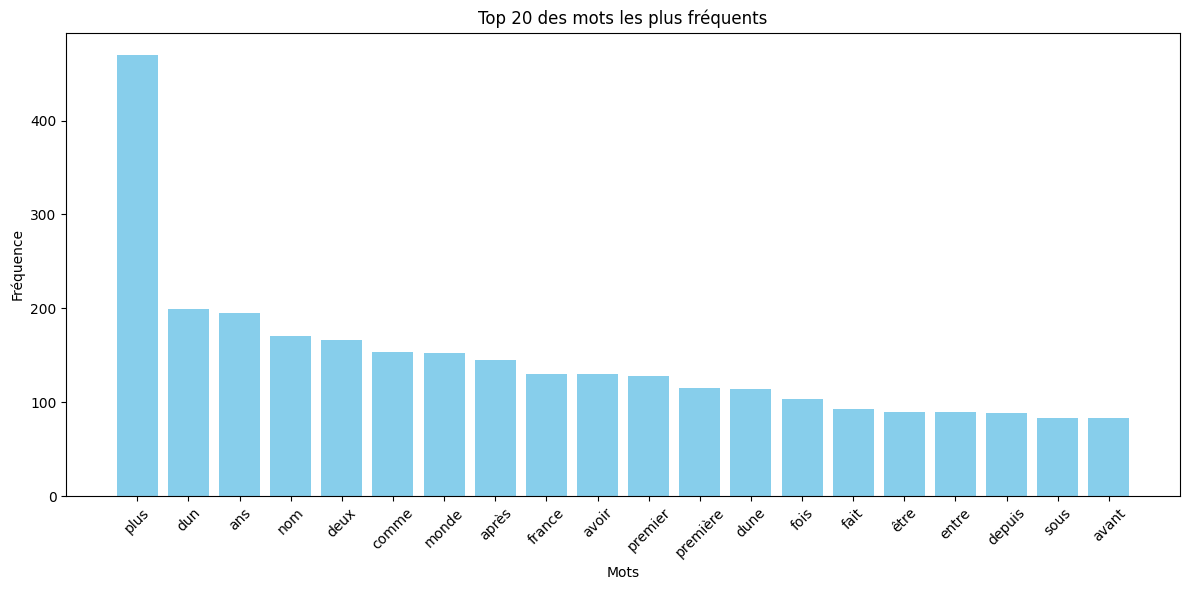

In [65]:
plt.figure(figsize=(12,6))
plt.bar(mots_top, comptes_top, color='skyblue')
plt.title("Top 20 des mots les plus fréquents")
plt.xlabel("Mots")
plt.ylabel("Fréquence")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Nombre de citations par année

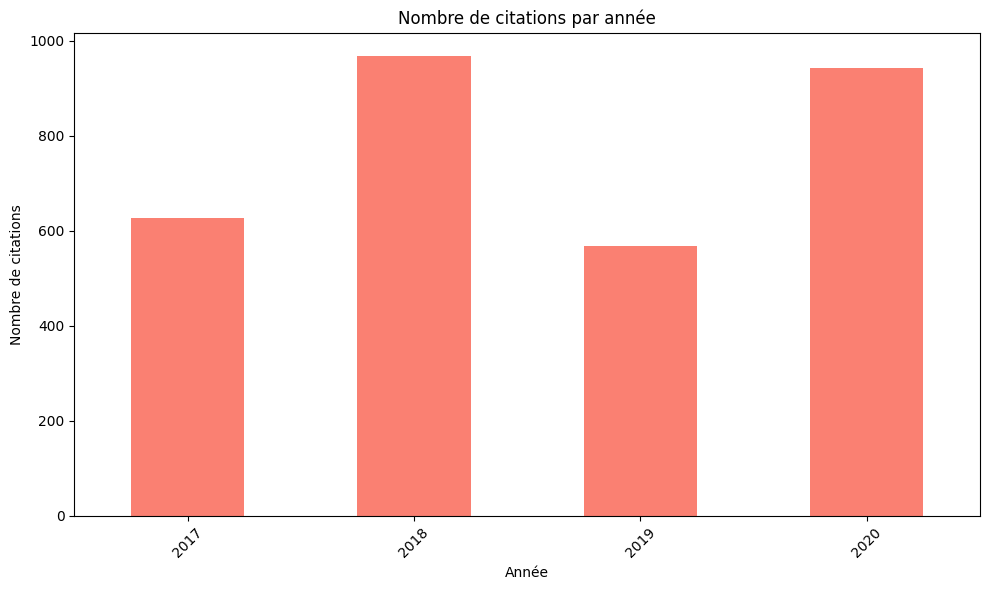

In [66]:
df_year = df.dropna(subset=['year']).copy()

# On s'assure que la colonne 'year' est de type entier (car parfois c'est float)
df_year['year'] = df_year['year'].astype(int)

# Calculer le nombre de citations par année
quotes_per_year = df_year['year'].value_counts().sort_index()

# Visualisation avec un diagramme en barres
plt.figure(figsize=(10,6))
quotes_per_year.plot(kind='bar', color='salmon')
plt.title("Nombre de citations par année")
plt.xlabel("Année")
plt.ylabel("Nombre de citations")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()